In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn.functional import one_hot
import random
import time
import math
import unicodedata
import string

In [4]:
import requests
url = "https://api.github.com/repos/DrUzair/NLP/contents/textclassification/surnames/names_data/names"
response = requests.get(url)
category_lines = {}
all_categories = []
if response.status_code == 200:
  # Parse the JSON response
  files_info = response.json()
  for file_info in files_info:
    file_name = file_info['name']
    category = file_name.split('/')[-1].split('.')[0]
    all_categories.append(category)
    download_url = file_info['download_url']
    file_response = requests.get(download_url)
    if file_response.status_code == 200:
      file_content = file_response.content.decode('utf-8')
      names = [name for name in file_content.split('\n') if len(name.strip())>1]
      category_lines[category] = names
    else:
      print("Error occurred:", response.status_code)
else:
  print("Error occurred:", response.status_code)
n_categories = len(all_categories)

In [5]:
n_categories = len(all_categories)
n_categories
category_lines

{'Arabic': ['Khoury',
  'Nahas',
  'Daher',
  'Gerges',
  'Nazari',
  'Maalouf',
  'Gerges',
  'Naifeh',
  'Guirguis',
  'Baba',
  'Sabbagh',
  'Attia',
  'Tahan',
  'Haddad',
  'Aswad',
  'Najjar',
  'Dagher',
  'Maloof',
  'Isa',
  'Asghar',
  'Nader',
  'Gaber',
  'Abboud',
  'Maalouf',
  'Zogby',
  'Srour',
  'Bahar',
  'Mustafa',
  'Hanania',
  'Daher',
  'Tuma',
  'Nahas',
  'Saliba',
  'Shamoon',
  'Handal',
  'Baba',
  'Amari',
  'Bahar',
  'Atiyeh',
  'Said',
  'Khouri',
  'Tahan',
  'Baba',
  'Mustafa',
  'Guirguis',
  'Sleiman',
  'Seif',
  'Dagher',
  'Bahar',
  'Gaber',
  'Harb',
  'Seif',
  'Asker',
  'Nader',
  'Antar',
  'Awad',
  'Srour',
  'Shadid',
  'Hajjar',
  'Hanania',
  'Kalb',
  'Shadid',
  'Bazzi',
  'Mustafa',
  'Masih',
  'Ghanem',
  'Haddad',
  'Isa',
  'Antoun',
  'Sarraf',
  'Sleiman',
  'Dagher',
  'Najjar',
  'Malouf',
  'Nahas',
  'Naser',
  'Saliba',
  'Shamon',
  'Malouf',
  'Kalb',
  'Daher',
  'Maalouf',
  'Wasem',
  'Kanaan',
  'Naifeh',
  'Boutro

In [7]:
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
  return ''.join(
 c for c in unicodedata.normalize('NFD', s)
if unicodedata.category(c) != 'Mn'
and c in all_letters
)

# Read a file and split into lines
def readLines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
  return all_letters.find(letter)
# Turn a name into a <name_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def nameToTensor(name):
  tensor = torch.zeros(len(name), 1, n_letters)
  for li, letter in enumerate(name):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor
def categoryFromOutput(output):
  top_n, top_i = output.data.topk(1) # Tensor out of Variable with .data
  category_i = top_i[0][0]
  return all_categories[category_i], category_i
def randomChoice(l):
  return l[random.randint(0, len(l) - 1)]
def randomTrainingPair():
  category = randomChoice(all_categories)
  name = randomChoice(category_lines[category])
  category_tensor = Variable(torch.LongTensor([all_categories.index(category)]))
  name_tensor = Variable(nameToTensor(name))
  return category, name, category_tensor, name_tensor

In [8]:
category, name, category_tensor, name_tensor = randomTrainingPair()
print(f"category: {category}")
print(f"category_tensor: {category_tensor}")
print(f"category_tensor shape: {category_tensor.shape}")
print(f"name: {name}")
print(f"name_tensor shape: {name_tensor.shape}")
print(f"name_tensor: {name_tensor}")

category: Italian
category_tensor: tensor([9])
category_tensor shape: torch.Size([1])
name: Crespo
name_tensor shape: torch.Size([6, 1, 58])
name_tensor: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0.,

In [9]:
class RNN_Textbook(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_Textbook, self).__init__()
    self.hidden_size = hidden_size
    self.W = nn.Linear(input_size, hidden_size)
    self.U = nn.Linear(hidden_size, hidden_size)
    self.V = nn.Linear(hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)
  def forward(self, input):
    self.hidden = torch.zeros(1, self.hidden_size)
    for i in range(input.size(0)): # Iterate through the time steps
      self.hidden = torch.tanh(self.W(input[i]) + self.U(self.hidden))
    output = self.V(self.hidden)
    output = self.softmax(output)
    return output
# Example usage:
input_size = 3 # sequence length
hidden_size = 20
output_size = 18
batch_size = 1
rnn = RNN_Textbook(input_size, hidden_size, output_size)
input = torch.randn(input_size, batch_size, input_size) # Sequence length x batch size x input size
output = rnn(input)
print(output) # This will be the output for the last time step

tensor([[-2.7055, -2.8759, -3.1031, -2.8264, -2.3140, -3.6663, -3.0769, -3.3751,
         -2.7646, -2.5113, -3.0660, -2.7338, -3.5192, -2.7541, -2.9547, -2.8454,
         -3.0355, -2.8030]], grad_fn=<LogSoftmaxBackward0>)


In [10]:
# Softmax
import torch.nn as nn
import torch.optim as optim
# Define your RNN model
class RNN_Pytorch(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_Pytorch, self).__init__()
    self.hidden_size = hidden_size
    self.rnn = nn.RNN(input_size, hidden_size)
    # output projection layer
    self.fc = nn.Linear(hidden_size, output_size)
    # softmax
    self.softmax = nn.LogSoftmax(dim=1)
  def forward(self, input):
    self.hidden = torch.zeros(1, input.size(1), self.hidden_size)
    output, self.hidden = self.rnn(input, self.hidden)
    output_last = output[-1] # Selecting the output of the last time step
    output = self.fc(output_last)
    output = self.softmax(output)
    return output

# Example usage:
input_size = 3 # sequence length
hidden_size = 20
output_size = 18
batch_size = 1
rnn = RNN_Pytorch(input_size, hidden_size, output_size)
input = torch.randn(input_size, batch_size, input_size) # Sequence length x batch size x input size
output = rnn(input)
print(output) # This will be the output for the last time step

tensor([[-2.5954, -3.0608, -2.6929, -3.0478, -2.6297, -2.9387, -2.9718, -3.0506,
         -3.1692, -2.4939, -3.2541, -3.1783, -2.9021, -2.7822, -2.9782, -2.6664,
         -3.1018, -2.9420]], grad_fn=<LogSoftmaxBackward0>)


In [11]:
n_hidden = 10, 100, 500
n_epochs = 20000
print_every = 1000
plot_every = 1000
learning_rate = 0.0001
batch_size = 1
#rnn = RNN_Textbook(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
rnn = RNN_Pytorch(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
#optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
def train(category_tensor, name_tensor):
  optimizer.zero_grad() # set gradients to zero
  output = rnn(name_tensor)
  loss = criterion(output, category_tensor)
  loss.backward()
  nn.utils.clip_grad_norm_(rnn.parameters(), 1) # gradient clipping : max_norm=1
  optimizer.step()
  return output, loss.item()

In [12]:
category, name, category_tensor, name_tensor = randomTrainingPair()
output, loss = train(category_tensor, name_tensor)
print(output)
print(loss)

tensor([[-2.9024, -2.8224, -2.9888, -2.9739, -2.7977, -2.9229, -2.8610, -2.9947,
         -2.7988, -2.9389, -3.0012, -2.9551, -2.9522, -2.7645, -2.8249, -2.7940,
         -2.8593, -2.9269]], grad_fn=<LogSoftmaxBackward0>)
2.8224353790283203


1000 1% (0m 4s) 2.9225 Peace / Dutch ✗ (English)
2000 2% (0m 7s) 2.2702 Xiao / Chinese ✓
3000 3% (0m 10s) 2.5486 Plourde / Italian ✗ (French)
4000 4% (0m 12s) 1.6791 Avhimovich / Russian ✓
5000 5% (0m 15s) 2.0048 Hatmullin / Russian ✓
6000 6% (0m 18s) 2.5620 Janick / English ✗ (Czech)
7000 7% (0m 21s) 2.2569 Doan / Chinese ✗ (Vietnamese)
8000 8% (0m 23s) 2.7788 Adam / Arabic ✗ (German)
9000 9% (0m 26s) 2.3615 Roosevelt / Greek ✗ (Dutch)
10000 10% (0m 32s) 2.6065 Nevejin / French ✗ (Russian)
11000 11% (0m 35s) 4.5234 Rey / Chinese ✗ (French)
12000 12% (0m 39s) 1.5089 Bitar / Arabic ✓
13000 13% (0m 44s) 2.3141 Tinkler / French ✗ (English)
14000 14% (0m 47s) 2.7392 Feigenbaum / French ✗ (German)
15000 15% (0m 49s) 2.0316 Dalach / Irish ✓
16000 16% (0m 52s) 2.1709 Craig / English ✗ (Scottish)
17000 17% (0m 57s) 1.5805 Khoury / Arabic ✓
18000 18% (1m 1s) 2.2640 Severins / French ✗ (Dutch)
19000 19% (1m 4s) 1.3096 Schuster / German ✓
20000 20% (1m 8s) 4.2960 Giolla / Spanish ✗ (Irish)
21000 

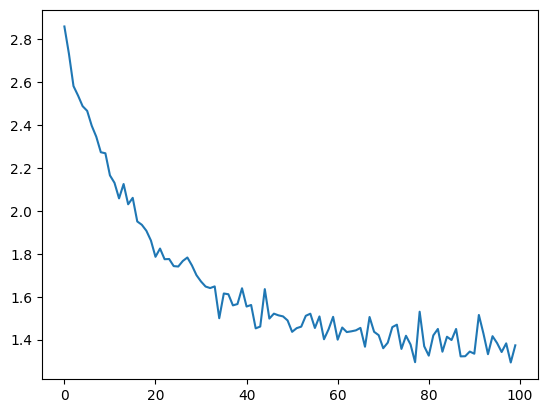

In [13]:
# Keep track of losses for plotting
current_loss = 0
all_losses = []
def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)
start = time.time()
for epoch in range(1, n_epochs + 1):
  category, name, category_tensor, name_tensor = randomTrainingPair()
  output, loss = train(category_tensor, name_tensor)
  current_loss += loss
  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (
    epoch, epoch / n_epochs * 100, timeSince(start), loss, name, guess, correct))
  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0
print(all_losses)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)
torch.save(rnn, 'char-rnn-classification.pt')

In [50]:
# ReLu
import torch.nn as nn
import torch.optim as optim
# Define your RNN model
class RNN_Pytorch(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_Pytorch, self).__init__()
    self.hidden_size = hidden_size
    self.rnn = nn.RNN(input_size, hidden_size, nonlinearity='relu')
    # output projection layer
    self.fc = nn.Linear(hidden_size, output_size)
    # softmax
    self.softmax = nn.LogSoftmax(dim=1)
  def forward(self, input):
    self.hidden = torch.zeros(1, input.size(1), self.hidden_size)
    output, self.hidden = self.rnn(input, self.hidden)
    output_last = output[-1] # Selecting the output of the last time step
    output = self.fc(output_last)
    output = self.softmax(output)
    return output

# Example usage:
input_size = 3 # sequence length
hidden_size = 20
output_size = 18
batch_size = 1
rnn = RNN_Pytorch(input_size, hidden_size, output_size)
input = torch.randn(input_size, batch_size, input_size) # Sequence length x batch size x input size
output = rnn(input)
print(output) # This will be the output for the last time step

tensor([[-3.2149, -3.0792, -2.9245, -3.2353, -2.6130, -2.7849, -3.1344, -3.3248,
         -3.3511, -3.1438, -3.0984, -2.5691, -2.5408, -2.2483, -3.0545, -2.6129,
         -2.9298, -3.0345]], grad_fn=<LogSoftmaxBackward0>)


tensor([[-2.8226, -3.1842, -2.9685, -3.2334, -2.8908, -2.9171, -2.8138, -3.0722,
         -2.9100, -2.8057, -2.8365, -2.7246, -2.6705, -3.0101, -3.1178, -2.6039,
         -2.6174, -3.1344]], grad_fn=<LogSoftmaxBackward0>)
3.134406089782715
1000 5% (0m 2s) 3.0090 Kuwabara / Polish ✗ (Japanese)
2000 10% (0m 5s) 3.2530 Kanne / Spanish ✗ (Dutch)
3000 15% (0m 7s) 2.9718 Lane / Spanish ✗ (French)
4000 20% (0m 10s) 2.9242 Ribeiro / Spanish ✗ (Portuguese)
5000 25% (0m 12s) 3.0520 Vuu / Spanish ✗ (Vietnamese)
6000 30% (0m 14s) 3.0028 O'Brien / Polish ✗ (Irish)
7000 35% (0m 17s) 3.0789 Romijn / English ✗ (Dutch)
8000 40% (0m 19s) 2.5796 Wiater / Polish ✓
9000 45% (0m 22s) 2.7006 De la cruz / Scottish ✗ (Spanish)
10000 50% (0m 24s) 2.8479 Shiroyama / Spanish ✗ (Japanese)
11000 55% (0m 26s) 2.9924 Nuallan / English ✗ (Irish)
12000 60% (0m 29s) 2.7781 Takeda / Spanish ✗ (Japanese)
13000 65% (0m 32s) 2.6966 Paredes / Spanish ✗ (Portuguese)
14000 70% (0m 34s) 2.5804 Sarraf / Arabic ✓
15000 75% (0m 36

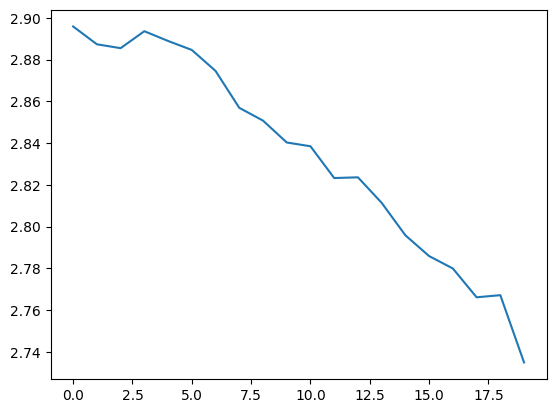

In [51]:
n_hidden = 10
n_epochs = 20000
print_every = 1000
plot_every = 1000
learning_rate = 0.0001
batch_size = 1
#rnn = RNN_Textbook(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
rnn = RNN_Pytorch(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
#optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
def train(category_tensor, name_tensor):
  optimizer.zero_grad() # set gradients to zero
  output = rnn(name_tensor)
  loss = criterion(output, category_tensor)
  loss.backward()
  nn.utils.clip_grad_norm_(rnn.parameters(), 1) # gradient clipping : max_norm=1
  optimizer.step()
  return output, loss.item()
category, name, category_tensor, name_tensor = randomTrainingPair()
output, loss = train(category_tensor, name_tensor)
print(output)
print(loss)

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)
start = time.time()
for epoch in range(1, n_epochs + 1):
  category, name, category_tensor, name_tensor = randomTrainingPair()
  output, loss = train(category_tensor, name_tensor)
  current_loss += loss
  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (
    epoch, epoch / n_epochs * 100, timeSince(start), loss, name, guess, correct))
  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0
print(all_losses)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)
torch.save(rnn, 'char-rnn-classification_ReLu.pt')

tensor([[-2.9180, -2.9693, -2.7147, -2.9814, -2.8542, -2.8882, -2.8897, -2.8584,
         -2.8683, -2.7926, -2.8974, -2.9078, -2.9348, -2.9397, -2.9332, -2.8264,
         -3.0156, -2.8801]], grad_fn=<LogSoftmaxBackward0>)
2.9396533966064453
1000 5% (0m 2s) 2.8472 Ferguson / Vietnamese ✗ (Scottish)
2000 10% (0m 6s) 2.7366 Hradek / Czech ✓
3000 15% (0m 8s) 2.6933 Szwedko / Czech ✗ (Polish)
4000 20% (0m 10s) 1.8525 Qiao / Chinese ✓
5000 25% (0m 13s) 2.4735 Ishimura / Russian ✗ (Japanese)
6000 30% (0m 16s) 1.9961 Mach / Korean ✗ (Vietnamese)
7000 35% (0m 19s) 1.3103 Frangopoulos / Greek ✓
8000 40% (0m 21s) 2.8018 Robert / French ✗ (Dutch)
9000 45% (0m 24s) 1.3759 Dao / Chinese ✗ (Vietnamese)
10000 50% (0m 26s) 2.7564 Hunter / German ✗ (Scottish)
11000 55% (0m 29s) 2.8241 Pickett / French ✗ (English)
12000 60% (0m 32s) 2.5584 Nizzola / Japanese ✗ (Italian)
13000 65% (0m 34s) 1.1850 Ton / Korean ✗ (Vietnamese)
14000 70% (0m 37s) 2.8154 Maçon / Arabic ✗ (French)
15000 75% (0m 39s) 1.3684 Pae 

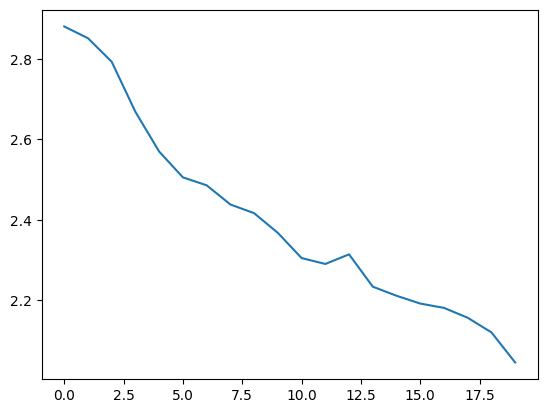

In [52]:
n_hidden = 100
n_epochs = 20000
print_every = 1000
plot_every = 1000
learning_rate = 0.0001
batch_size = 1
#rnn = RNN_Textbook(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
rnn = RNN_Pytorch(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
#optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
def train(category_tensor, name_tensor):
  optimizer.zero_grad() # set gradients to zero
  output = rnn(name_tensor)
  loss = criterion(output, category_tensor)
  loss.backward()
  nn.utils.clip_grad_norm_(rnn.parameters(), 1) # gradient clipping : max_norm=1
  optimizer.step()
  return output, loss.item()
category, name, category_tensor, name_tensor = randomTrainingPair()
output, loss = train(category_tensor, name_tensor)
print(output)
print(loss)

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)
start = time.time()
for epoch in range(1, n_epochs + 1):
  category, name, category_tensor, name_tensor = randomTrainingPair()
  output, loss = train(category_tensor, name_tensor)
  current_loss += loss
  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (
    epoch, epoch / n_epochs * 100, timeSince(start), loss, name, guess, correct))
  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0
print(all_losses)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)
torch.save(rnn, 'char-rnn-classification_ReLu.pt')

tensor([[-2.8596, -2.8550, -2.8930, -2.8844, -2.9529, -2.9001, -2.8670, -2.8813,
         -2.9087, -2.9416, -2.8657, -2.9203, -2.8757, -2.8921, -2.8974, -2.8445,
         -2.8885, -2.9060]], grad_fn=<LogSoftmaxBackward0>)
2.941588878631592
1000 5% (0m 8s) 3.1156 Sokolowski / Russian ✗ (Polish)
2000 10% (0m 17s) 1.5200 Tai / Vietnamese ✗ (Chinese)
3000 15% (0m 27s) 2.2494 Jaskulski / Russian ✗ (Polish)
4000 20% (0m 37s) 2.5494 Armando / Scottish ✗ (Spanish)
5000 25% (0m 46s) 2.7113 Kassis / Scottish ✗ (Arabic)
6000 30% (0m 56s) 0.7569 Wei / Chinese ✓
7000 35% (1m 5s) 2.9741 Schofield / Greek ✗ (English)
8000 40% (1m 15s) 1.7099 Lord / English ✓
9000 45% (1m 24s) 1.9179 Arah / English ✓
10000 50% (1m 33s) 2.1224 Ogura / Arabic ✗ (Japanese)
11000 55% (1m 43s) 7.8883 Tsoumada / Japanese ✗ (Greek)
12000 60% (1m 53s) 2.9159 Komo / Japanese ✗ (Czech)
13000 65% (2m 2s) 2.7197 Kouches / Dutch ✗ (Greek)
14000 70% (2m 11s) 4.0159 Bakhuta / Japanese ✗ (Russian)
15000 75% (2m 21s) 1.5409 Schneijder

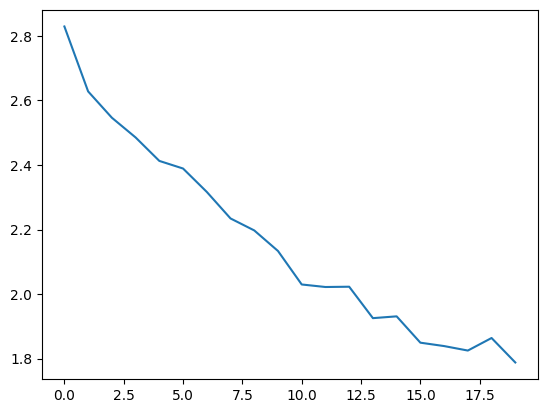

In [53]:
n_hidden = 500
n_epochs = 20000
print_every = 1000
plot_every = 1000
learning_rate = 0.0001
batch_size = 1
#rnn = RNN_Textbook(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
rnn = RNN_Pytorch(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
#optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
def train(category_tensor, name_tensor):
  optimizer.zero_grad() # set gradients to zero
  output = rnn(name_tensor)
  loss = criterion(output, category_tensor)
  loss.backward()
  nn.utils.clip_grad_norm_(rnn.parameters(), 1) # gradient clipping : max_norm=1
  optimizer.step()
  return output, loss.item()
category, name, category_tensor, name_tensor = randomTrainingPair()
output, loss = train(category_tensor, name_tensor)
print(output)
print(loss)

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)
start = time.time()
for epoch in range(1, n_epochs + 1):
  category, name, category_tensor, name_tensor = randomTrainingPair()
  output, loss = train(category_tensor, name_tensor)
  current_loss += loss
  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (
    epoch, epoch / n_epochs * 100, timeSince(start), loss, name, guess, correct))
  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0
print(all_losses)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)
torch.save(rnn, 'char-rnn-classification_ReLu.pt')

In [55]:
# tanh
import torch.nn as nn
import torch.optim as optim
# Define your RNN model
class RNN_Pytorch(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_Pytorch, self).__init__()
    self.hidden_size = hidden_size
    self.rnn = nn.RNN(input_size, hidden_size, nonlinearity="tanh")
    # output projection layer
    self.fc = nn.Linear(hidden_size, output_size)
    # softmax
    self.softmax = nn.LogSoftmax(dim=1)
  def forward(self, input):
    self.hidden = torch.zeros(1, input.size(1), self.hidden_size)
    output, self.hidden = self.rnn(input, self.hidden)
    output_last = output[-1] # Selecting the output of the last time step
    output = self.fc(output_last)
    output = self.softmax(output)
    return output

# Example usage:
input_size = 3 # sequence length
hidden_size = 20
output_size = 18
batch_size = 1
rnn = RNN_Pytorch(input_size, hidden_size, output_size)
input = torch.randn(input_size, batch_size, input_size) # Sequence length x batch size x input size
output = rnn(input)
print(output) # This will be the output for the last time step

tensor([[-3.1033, -3.0515, -2.9696, -2.9061, -2.9837, -3.0375, -2.9917, -2.9311,
         -3.0174, -2.7520, -2.7717, -2.9533, -2.8688, -2.9914, -2.7486, -2.7641,
         -2.8174, -2.5454]], grad_fn=<LogSoftmaxBackward0>)


tensor([[-2.9644, -3.3213, -2.6194, -2.8631, -2.8425, -3.6109, -2.7294, -3.2683,
         -3.0831, -2.4654, -2.9141, -2.8899, -2.8765, -3.0343, -3.3317, -2.4254,
         -2.4546, -3.2551]], grad_fn=<LogSoftmaxBackward0>)
3.268343448638916
1000 5% (0m 2s) 3.1373 Maneates / Spanish ✗ (Greek)
2000 10% (0m 5s) 3.1977 Shang / Scottish ✗ (Chinese)
3000 15% (0m 7s) 3.1221 Bonnet / Portuguese ✗ (French)
4000 20% (0m 9s) 3.0269 Antar / Italian ✗ (Arabic)
5000 25% (0m 11s) 2.6672 De la cruz / Italian ✗ (Spanish)
6000 30% (0m 14s) 2.6934 Janz / Italian ✗ (German)
7000 35% (0m 16s) 2.7385 Garfagnini / Spanish ✗ (Italian)
8000 40% (0m 19s) 2.7819 Böhm / Czech ✗ (German)
9000 45% (0m 21s) 2.9064 Rios / Scottish ✗ (Portuguese)
10000 50% (0m 23s) 2.8823 Kassis / Polish ✗ (Arabic)
11000 55% (0m 25s) 2.4263 Peláez / Italian ✗ (Spanish)
12000 60% (0m 28s) 2.7506 Pinheiro / Scottish ✗ (Portuguese)
13000 65% (0m 30s) 2.6668 Shaw / Czech ✗ (Scottish)
14000 70% (0m 33s) 2.9419 Sekine / Dutch ✗ (Japanese)
15

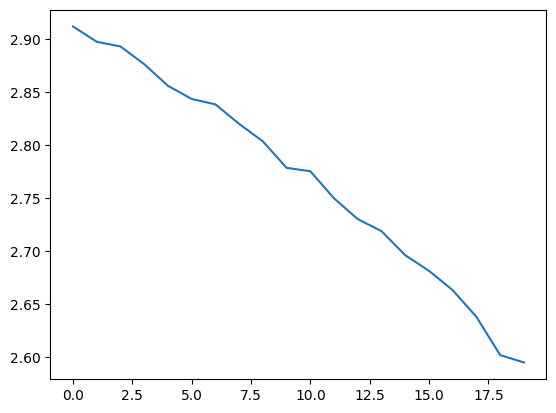

In [56]:
n_hidden = 10
n_epochs = 20000
print_every = 1000
plot_every = 1000
learning_rate = 0.0001
batch_size = 1
#rnn = RNN_Textbook(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
rnn = RNN_Pytorch(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
#optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
def train(category_tensor, name_tensor):
  optimizer.zero_grad() # set gradients to zero
  output = rnn(name_tensor)
  loss = criterion(output, category_tensor)
  loss.backward()
  nn.utils.clip_grad_norm_(rnn.parameters(), 1) # gradient clipping : max_norm=1
  optimizer.step()
  return output, loss.item()
category, name, category_tensor, name_tensor = randomTrainingPair()
output, loss = train(category_tensor, name_tensor)
print(output)
print(loss)

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)
start = time.time()
for epoch in range(1, n_epochs + 1):
  category, name, category_tensor, name_tensor = randomTrainingPair()
  output, loss = train(category_tensor, name_tensor)
  current_loss += loss
  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (
    epoch, epoch / n_epochs * 100, timeSince(start), loss, name, guess, correct))
  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0
print(all_losses)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)
torch.save(rnn, 'char-rnn-classification_Tanh.pt')

tensor([[-2.9231, -2.9437, -3.0296, -2.8506, -2.7869, -2.8577, -2.9683, -2.7746,
         -3.0185, -2.8230, -2.9260, -2.9179, -2.7941, -2.9921, -2.8509, -2.9053,
         -2.8364, -2.8795]], grad_fn=<LogSoftmaxBackward0>)
2.8364243507385254
1000 5% (0m 2s) 2.7118 Nishihara / Polish ✗ (Japanese)
2000 10% (0m 4s) 2.2114 Matsoukis / Greek ✓
3000 15% (0m 7s) 2.2439 Najjar / Arabic ✓
4000 20% (0m 10s) 2.7040 Shunji / Arabic ✗ (Japanese)
5000 25% (0m 12s) 2.1902 Notoriano / Italian ✓
6000 30% (0m 14s) 1.3217 Georgeakopoulos / Greek ✓
7000 35% (0m 17s) 3.1665 Mendelsohn / Russian ✗ (German)
8000 40% (0m 20s) 2.4657 Ureña / Portuguese ✗ (Spanish)
9000 45% (0m 22s) 1.8045 Altimari / Italian ✓
10000 50% (0m 25s) 2.8453 Salinas / Greek ✗ (Spanish)
11000 55% (0m 27s) 2.4241 Banos / Arabic ✗ (Greek)
12000 60% (0m 30s) 1.5031 Hadad / Arabic ✓
13000 65% (0m 33s) 2.3258 Gutierrez / Dutch ✗ (Spanish)
14000 70% (0m 35s) 1.1319 Kowalczyk / Polish ✓
15000 75% (0m 37s) 1.2696 Yun / Chinese ✗ (Korean)
16000

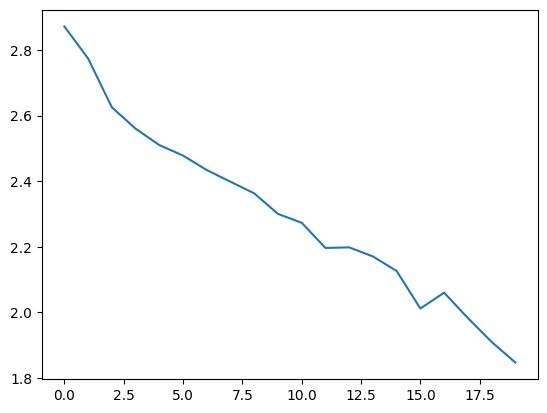

In [57]:
n_hidden = 100
n_epochs = 20000
print_every = 1000
plot_every = 1000
learning_rate = 0.0001
batch_size = 1
#rnn = RNN_Textbook(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
rnn = RNN_Pytorch(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
#optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
def train(category_tensor, name_tensor):
  optimizer.zero_grad() # set gradients to zero
  output = rnn(name_tensor)
  loss = criterion(output, category_tensor)
  loss.backward()
  nn.utils.clip_grad_norm_(rnn.parameters(), 1) # gradient clipping : max_norm=1
  optimizer.step()
  return output, loss.item()
category, name, category_tensor, name_tensor = randomTrainingPair()
output, loss = train(category_tensor, name_tensor)
print(output)
print(loss)

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)
start = time.time()
for epoch in range(1, n_epochs + 1):
  category, name, category_tensor, name_tensor = randomTrainingPair()
  output, loss = train(category_tensor, name_tensor)
  current_loss += loss
  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (
    epoch, epoch / n_epochs * 100, timeSince(start), loss, name, guess, correct))
  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0
print(all_losses)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)
torch.save(rnn, 'char-rnn-classification_Tanh.pt')

tensor([[-2.9000, -2.8478, -2.8487, -2.9442, -2.9282, -2.8809, -2.8230, -2.8722,
         -2.8126, -2.8843, -2.9061, -2.8899, -2.9241, -2.8581, -2.8693, -2.9264,
         -2.9271, -3.0019]], grad_fn=<LogSoftmaxBackward0>)
2.924057722091675
1000 5% (0m 7s) 2.1127 Tong / Korean ✗ (Chinese)
2000 10% (0m 13s) 3.5698 Bawin / Arabic ✗ (Russian)
3000 15% (0m 20s) 3.7491 Róg / Korean ✗ (Polish)
4000 20% (0m 28s) 2.7955 Séverin / Irish ✗ (French)
5000 25% (0m 35s) 1.0915 To / Korean ✗ (Vietnamese)
6000 30% (0m 42s) 1.8027 Vinh / Chinese ✗ (Vietnamese)
7000 35% (0m 49s) 2.4778 Asghar / Czech ✗ (Arabic)
8000 40% (0m 56s) 2.6792 Souza / Czech ✗ (Portuguese)
9000 45% (1m 3s) 4.1016 Abano / Japanese ✗ (Spanish)
10000 50% (1m 9s) 0.7640 Sakellariou / Greek ✓
11000 55% (1m 16s) 2.2913 Vivas / Irish ✗ (Spanish)
12000 60% (1m 23s) 0.5188 Lao / Chinese ✓
13000 65% (1m 30s) 1.7402 Belmonte / Spanish ✗ (Italian)
14000 70% (1m 37s) 1.5220 Temple / Scottish ✗ (English)
15000 75% (1m 44s) 0.6569 Paszek / Poli

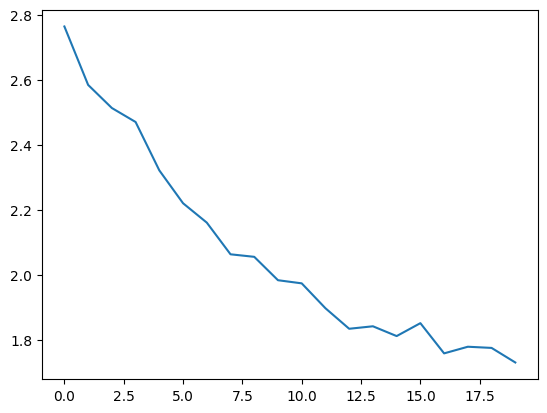

In [58]:
n_hidden = 500
n_epochs = 20000
print_every = 1000
plot_every = 1000
learning_rate = 0.0001
batch_size = 1
#rnn = RNN_Textbook(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
rnn = RNN_Pytorch(input_size=n_letters, hidden_size=n_hidden, output_size=n_categories)
#optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
# criterion = nn.CrossEntropyLoss()
def train(category_tensor, name_tensor):
  optimizer.zero_grad() # set gradients to zero
  output = rnn(name_tensor)
  loss = criterion(output, category_tensor)
  loss.backward()
  nn.utils.clip_grad_norm_(rnn.parameters(), 1) # gradient clipping : max_norm=1
  optimizer.step()
  return output, loss.item()
category, name, category_tensor, name_tensor = randomTrainingPair()
output, loss = train(category_tensor, name_tensor)
print(output)
print(loss)

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)
start = time.time()
for epoch in range(1, n_epochs + 1):
  category, name, category_tensor, name_tensor = randomTrainingPair()
  output, loss = train(category_tensor, name_tensor)
  current_loss += loss
  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (
    epoch, epoch / n_epochs * 100, timeSince(start), loss, name, guess, correct))
  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0
print(all_losses)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.plot(all_losses)
torch.save(rnn, 'char-rnn-classification_Tanh.pt')

In [14]:
import sys
rnn = torch.load('char-rnn-classification.pt')

In [30]:
# Just return an output given a name
def evaluate(name_tensor):
  output = rnn(name_tensor)
  return output

def predict(line, n_predictions=3):
  output = evaluate(Variable(nameToTensor(line)))
  # Get top N categories
  topv, topi = output.data.topk(n_predictions, 1, True)
  predictions = []
  for i in range(n_predictions):
    value = topv[0][i]
    category_index = topi[0][i]
    print('(%.2f) %s' % (value, all_categories[category_index]))
    predictions.append([value, all_categories[category_index]])
  return predictions
predict('yang')

(-0.01) Chinese
(-4.83) Japanese
(-6.09) Vietnamese


[[tensor(-0.0139), 'Chinese'],
 [tensor(-4.8299), 'Japanese'],
 [tensor(-6.0882), 'Vietnamese']]